In [28]:
import os
import pandas as pd
from pydataset import data
import env
import seaborn as sns

# import our own acquire module
import acquire

import numpy as np
import matplotlib.pyplot as plt


# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from prepare import my_train_test_split

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

In [2]:
taxis = sns.load_dataset('taxis')

taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [3]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


In [4]:
taxis.payment.value_counts()

credit card    4577
cash           1812
Name: payment, dtype: int64

In [5]:
taxis.color.value_counts()

yellow    5451
green      982
Name: color, dtype: int64

In [6]:
taxis.pickup_zone.value_counts()

Midtown Center                         230
Upper East Side South                  211
Penn Station/Madison Sq West           210
Clinton East                           208
Midtown East                           198
                                      ... 
Homecrest                                1
Bedford Park                             1
Riverdale/North Riverdale/Fieldston      1
Hollis                                   1
Hillcrest/Pomonok                        1
Name: pickup_zone, Length: 194, dtype: int64

In [7]:
taxis.describe().T

,count,mean,std,min,25%,50%,75%,max
passengers,6433.0,1.539251,1.203768,0.0,1.00,1.00,2.00,6.00
distance,6433.0,3.024617,3.827867,0.0,0.98,1.64,3.21,36.70
fare,6433.0,13.091073,11.551804,1.0,6.50,9.50,15.00,150.00
tip,6433.0,1.979220,2.448560,0.0,0.00,1.70,2.80,33.20
tolls,6433.0,0.325273,1.415267,0.0,0.00,0.00,0.00,24.02
total,6433.0,18.517794,13.815570,1.3,10.80,14.16,20.30,174.82


In [8]:
## dropping columns

taxis = taxis.drop(['pickup', 'dropoff', 'pickup_zone', 'dropoff_zone'], axis = 1)

In [9]:
taxis.head()

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_borough,dropoff_borough
0,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Manhattan,Manhattan
1,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Manhattan,Manhattan
2,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Manhattan,Manhattan
3,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Manhattan,Manhattan
4,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Manhattan,Manhattan


In [10]:
## look for nulls

taxis.isnull().sum()

passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_borough     26
dropoff_borough    45
dtype: int64

In [11]:
taxis = taxis.dropna()

In [12]:
taxis.isnull().sum()

passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_borough     0
dropoff_borough    0
dtype: int64

In [13]:
## make dummies for : color, payment, pickup_borough, dropoff_borough

taxi_dummy = pd.get_dummies(taxis[['color', 'payment', 'pickup_borough', 'dropoff_borough']], drop_first = True)
taxi_dummy.head()

,color_yellow,payment_credit card,pickup_borough_Brooklyn,pickup_borough_Manhattan,pickup_borough_Queens,dropoff_borough_Brooklyn,dropoff_borough_Manhattan,dropoff_borough_Queens,dropoff_borough_Staten Island
0,1,1,0,1,0,0,1,0,0
1,1,0,0,1,0,0,1,0,0
2,1,1,0,1,0,0,1,0,0
3,1,1,0,1,0,0,1,0,0
4,1,1,0,1,0,0,1,0,0


In [14]:
## concatenate

taxis = pd.concat([taxis, taxi_dummy], axis = 1)
taxis.head()

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_borough,dropoff_borough,color_yellow,payment_credit card,pickup_borough_Brooklyn,pickup_borough_Manhattan,pickup_borough_Queens,dropoff_borough_Brooklyn,dropoff_borough_Manhattan,dropoff_borough_Queens,dropoff_borough_Staten Island
0,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Manhattan,Manhattan,1,1,0,1,0,0,1,0,0
1,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Manhattan,Manhattan,1,0,0,1,0,0,1,0,0
2,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Manhattan,Manhattan,1,1,0,1,0,0,1,0,0
3,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Manhattan,Manhattan,1,1,0,1,0,0,1,0,0
4,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Manhattan,Manhattan,1,1,0,1,0,0,1,0,0


In [15]:
## rename boroughs to get rid of space in words

taxis = taxis.rename(columns = {'payment_credit card':'payment_credit_card', 
                                 'dropoff_borough_Staten Island':'dropoff_borough_Staten_Island'})

In [16]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6341 entries, 0 to 6432
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   passengers                     6341 non-null   int64  
 1   distance                       6341 non-null   float64
 2   fare                           6341 non-null   float64
 3   tip                            6341 non-null   float64
 4   tolls                          6341 non-null   float64
 5   total                          6341 non-null   float64
 6   color                          6341 non-null   object 
 7   payment                        6341 non-null   object 
 8   pickup_borough                 6341 non-null   object 
 9   dropoff_borough                6341 non-null   object 
 10  color_yellow                   6341 non-null   uint8  
 11  payment_credit_card            6341 non-null   uint8  
 12  pickup_borough_Brooklyn        6341 non-null   u

In [17]:
## put columns into bins

In [18]:
# num_vars = ['passengers', 'distance', 'fare', 'tip', 'total']

# option for the one below

In [19]:
num_vars = taxis.select_dtypes(include = ['int64', 'float64'])

In [20]:
cat_vars = taxis.select_dtypes(include = ['object', 'uint8'])

# unsigned integer-8 is a Boolean Y/N

In [21]:
def my_train_test_split(df, target):
    
    train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[target])
    
    train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train[target])
    
    return train, validate, test

In [22]:
## split the data

train, validate, test = my_train_test_split(taxis, target = 'color')

train.shape, validate.shape, test.shape


((3804, 19), (1268, 19), (1269, 19))

color
yellow    3224
green      580
Name: color, dtype: int64
yellow    84.752892
green     15.247108
Name: color, dtype: float64


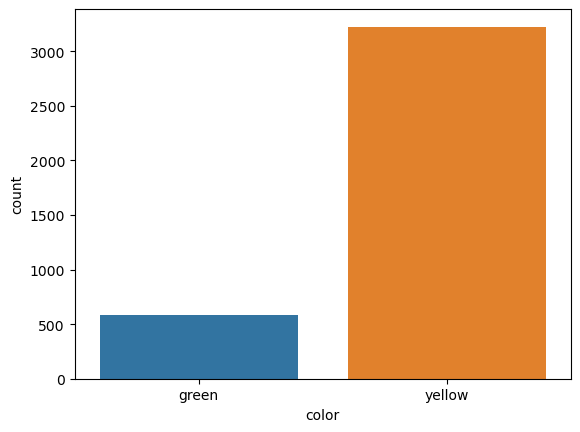

payment
credit card    2738
cash           1066
Name: payment, dtype: int64
credit card    71.976866
cash           28.023134
Name: payment, dtype: float64


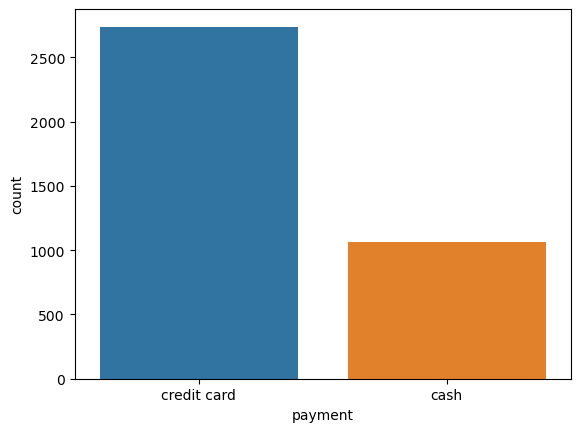

pickup_borough
Manhattan    3131
Queens        382
Brooklyn      229
Bronx          62
Name: pickup_borough, dtype: int64
Manhattan    82.308097
Queens       10.042061
Brooklyn      6.019979
Bronx         1.629863
Name: pickup_borough, dtype: float64


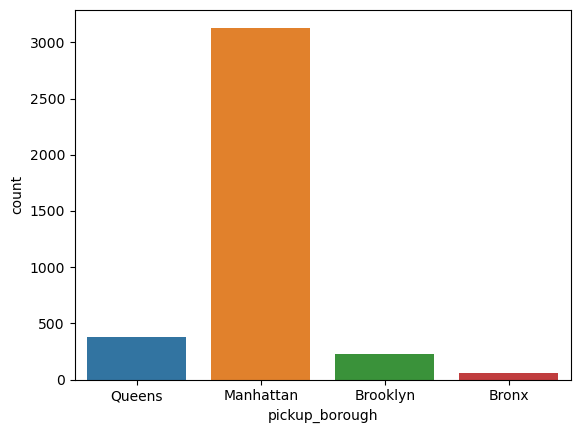

dropoff_borough
Manhattan        3109
Queens            318
Brooklyn          293
Bronx              83
Staten Island       1
Name: dropoff_borough, dtype: int64
Manhattan        81.729758
Queens            8.359621
Brooklyn          7.702419
Bronx             2.181914
Staten Island     0.026288
Name: dropoff_borough, dtype: float64


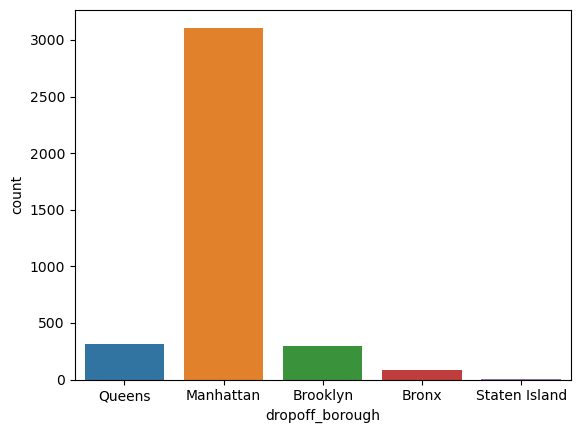

color_yellow
1    3224
0     580
Name: color_yellow, dtype: int64
1    84.752892
0    15.247108
Name: color_yellow, dtype: float64


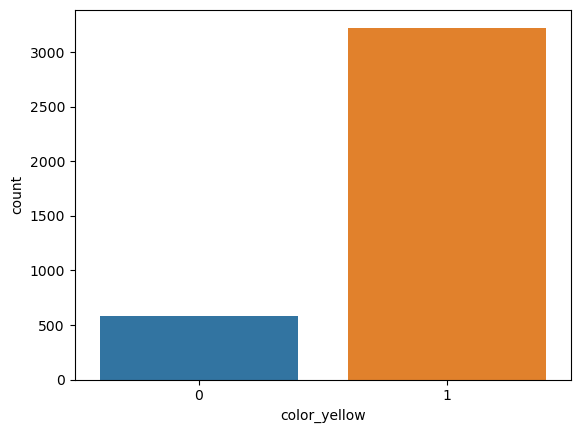

payment_credit_card
1    2738
0    1066
Name: payment_credit_card, dtype: int64
1    71.976866
0    28.023134
Name: payment_credit_card, dtype: float64


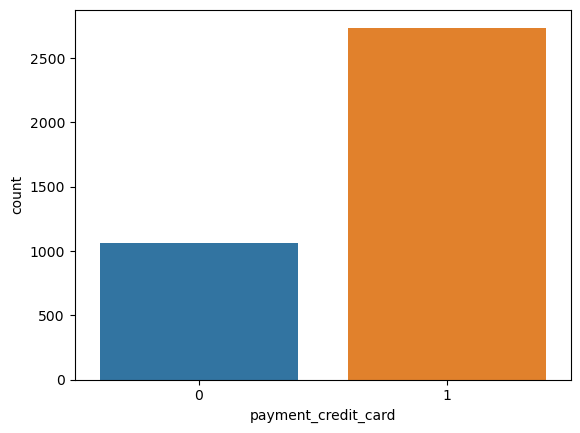

pickup_borough_Brooklyn
0    3575
1     229
Name: pickup_borough_Brooklyn, dtype: int64
0    93.980021
1     6.019979
Name: pickup_borough_Brooklyn, dtype: float64


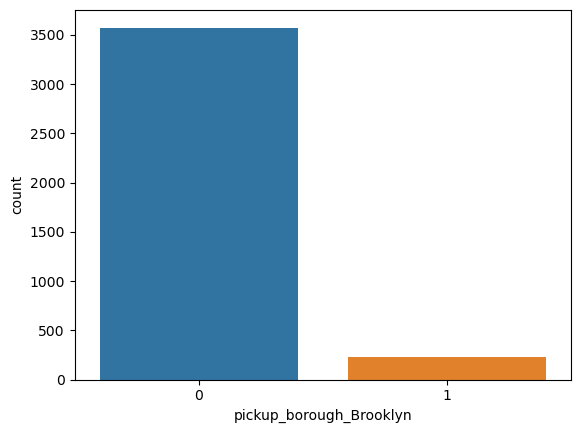

pickup_borough_Manhattan
1    3131
0     673
Name: pickup_borough_Manhattan, dtype: int64
1    82.308097
0    17.691903
Name: pickup_borough_Manhattan, dtype: float64


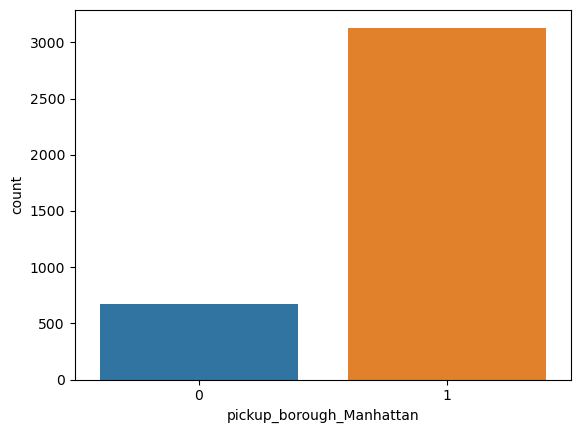

pickup_borough_Queens
0    3422
1     382
Name: pickup_borough_Queens, dtype: int64
0    89.957939
1    10.042061
Name: pickup_borough_Queens, dtype: float64


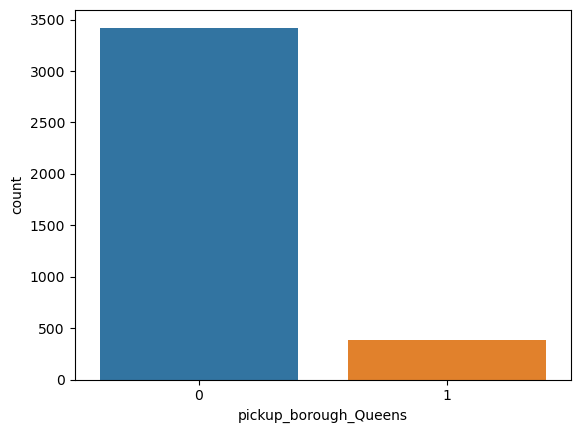

dropoff_borough_Brooklyn
0    3511
1     293
Name: dropoff_borough_Brooklyn, dtype: int64
0    92.297581
1     7.702419
Name: dropoff_borough_Brooklyn, dtype: float64


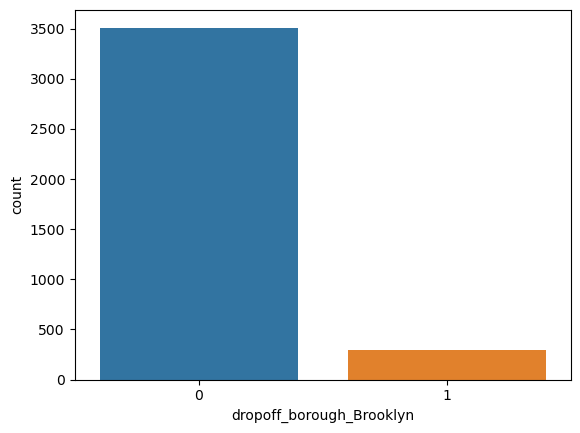

dropoff_borough_Manhattan
1    3109
0     695
Name: dropoff_borough_Manhattan, dtype: int64
1    81.729758
0    18.270242
Name: dropoff_borough_Manhattan, dtype: float64


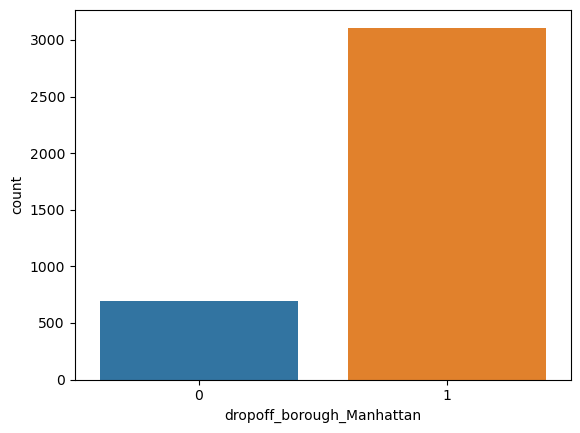

dropoff_borough_Queens
0    3486
1     318
Name: dropoff_borough_Queens, dtype: int64
0    91.640379
1     8.359621
Name: dropoff_borough_Queens, dtype: float64


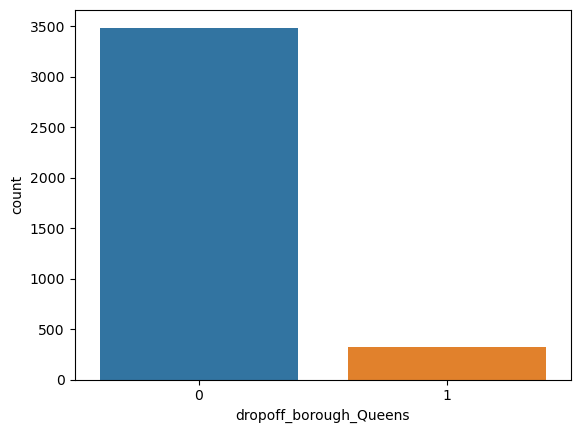

dropoff_borough_Staten_Island
0    3803
1       1
Name: dropoff_borough_Staten_Island, dtype: int64
0    99.973712
1     0.026288
Name: dropoff_borough_Staten_Island, dtype: float64


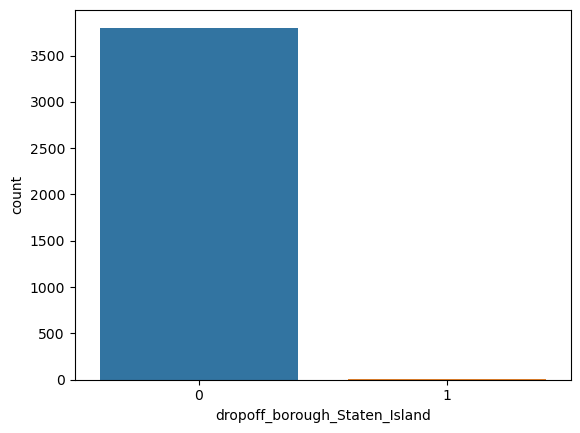

In [23]:
## make a loop with all the CATEGORICAL variables

for col in cat_vars:
    print(col)
    print(train[col].value_counts())                        ## value count of each
    print(train[col].value_counts(normalize = True) * 100)      ## pc of each column
    sns.countplot(x = col, data = train)
    plt.show()
    
    

passengers


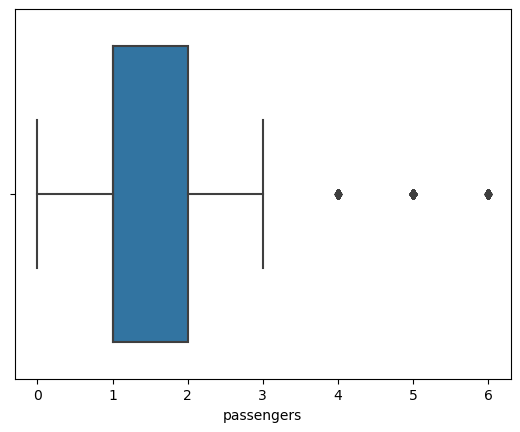

distance


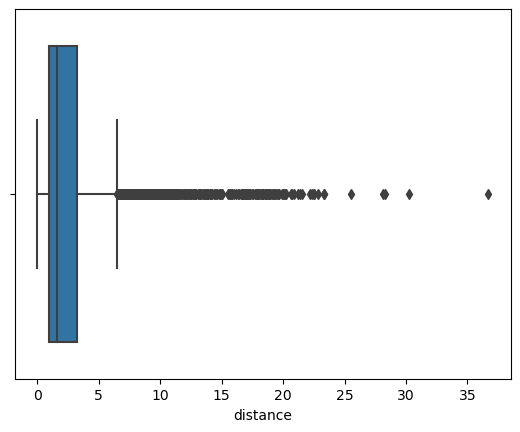

fare


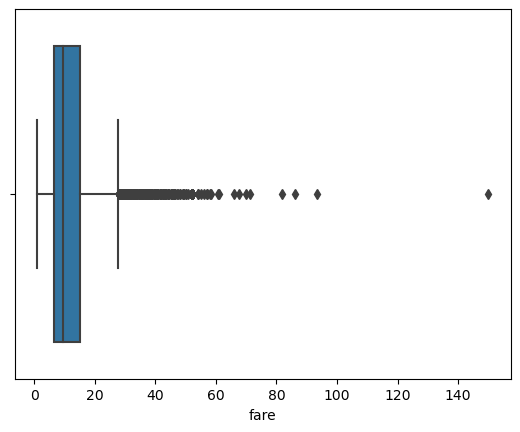

tip


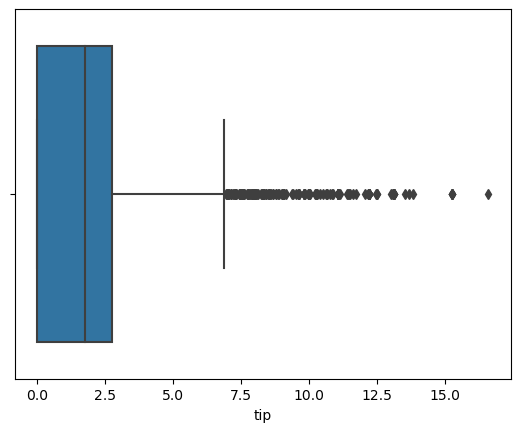

tolls


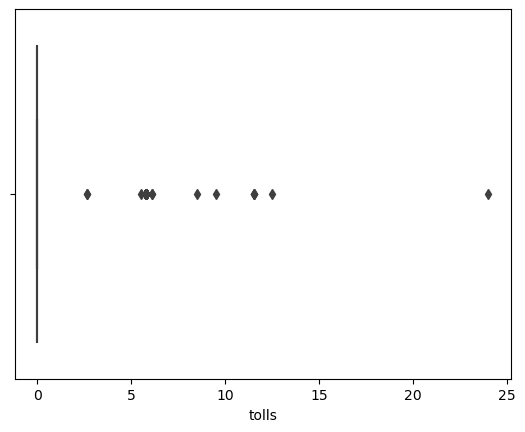

total


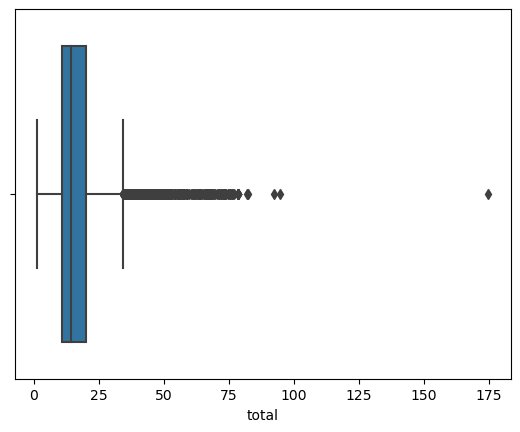

In [24]:
## make a loop with all the NUMERICAL variables

for col in num_vars:
    print(col)
    sns.boxplot(x = col, data = train)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


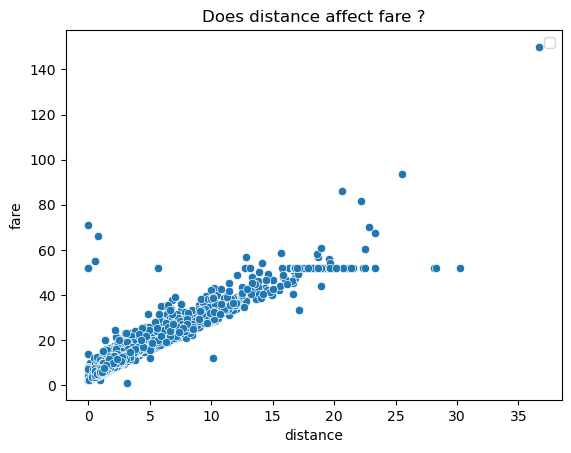

In [25]:
## DOES DISTANCE AFFECT THE FARE ?

## bivariate

plt.title('Does distance affect fare ?')

## stratify will be what the target is (y-axis variable)

sns.scatterplot(x = 'distance', y = 'fare', data = train)

plt.legend()

<AxesSubplot:xlabel='passengers', ylabel='fare'>

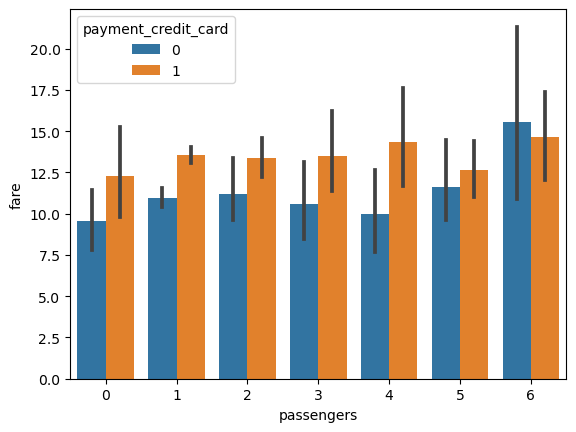

In [26]:
sns.barplot(x = 'passengers', y = 'fare', hue = 'payment_credit_card', data = train)

# multivariate

<h1 style="background-color:yellow;"> Exploration Lesson, continued, 12 Dec 2022

**Goals Of EDA**

    1 / Discover the features that are driving the outcome (target) :   
        Target variable = what's driving the exploration (species, survivors, churn).  
    2 / Learn the vast majority of the takeaways and interesting stories from the data.  
    3 / Discover if we need to drop 'features' (aka, variables), how to handle missing values, or if there's value to combining features.


**EDA Process**  

    1 / Hypothesise : What do I think is occuring, what questions do I have ?  How to predictors (independent variables, features, attributes) interact with my target (y-value / dependent variable) ?  Anwers come when controlling for other variables (ie, controlling for homes in OC with >= 3 BR, does Nº BA make a difference ? Are women in 1st class more likely to survive if travelling with a family or alone ?)  
    State this in normal language.   
    2 / Visualise :  
    Continuous w continuous variable (relplot, scatterplot, Pearson's R for normal distrib / Spearman's R).   
    Cat + contin (barplot x = categ / discrete variable, y = continuous variable, box & whisker, swarmplot, violin plot).  
    Histogram is a distribution (x = bins of a continuous variable, y = the frequency / counts).  
    Cat + cat variable (ie, sex + survived; crosstab / contingency table, barplot).  
    Scatter plot : species (3 species) + colour (no boolean) : x = colour, y = sepal_area ; dot colours indicate the species.  
    3 / Test hypotheses.  
    


**1 / _Univariate Statistics_ :** Describtive stats, frequencies, histograms of an individual variable. **Do this before splitting data.** This will show null values, outliers, etc, to address.  
.   .  
.   .  
**2 / _Bivariate Statistics_ :** Plotting interaction of each variable with the target. Document takeaways. Explore interaction of independent variables using visualisations and / or hypothesis testing to address interdependence.   

        - Continuous vs continuous : Scatterplot.  
        Testing for correlation = Pearson's R for normal distrib / Spearman's R.  
        - Continuous vs discrete (x = discrete) : Barchart, violin plot, swarmplot.   
        Testing for comparing the means of the continuous variable for the categories / different groups in the discrete variable = T-test, ANOVA, Mann-Whitney, Kruskal-Wallis.   
        - Discrete vs discrete (y = Boolean, x = other discrete) : Barchart, X represents % of Boolean in each category.  Crosstab (discrete1 x discrete1).   
        Testing for dependence / relationship of two groups / two discrete variables = Chi-squared.  
   
Then it's : Building a mask, filtering out data, then undertaking the EDA Process.  
.     .  
.     .  
**3 / _Multivariate Statistics_ :**  

    - More than 2 variables, possibly more than 2 setps :   
           - Filtering + taking a subset (ie, of the females, is there a dif in those who survived depending on class), and / or   
           - Filtering + adding a new variable, like colour (colour = different categories in the discrete variable; add another discrete with different colours of bars.  
    - The 3rd variable needs to be discrete, or transformed to discrete by binning.  
    - Testing using a T-Test, taking a subset : Control for 1 variable (exploring sex + class, target : survived = is there a relationship btwn class & survived for males and btwn class & survived for females, with sex being the control variable)  
    - Fascets : Use subplots of each category 
        - If charting : sex + pclass + alone + survived, a facet plot would be alone / not alone + M/F.  
        - Another facet plot would be x = pclass (1,2,3) + alone / not alone + y = survived + a colour for M/F.  
        - There'd be 2 separate plots (alone / not alone).